# Simple Linear Regression

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

## Part 1: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [4]:
advertisting = pd.read_csv('./data/Advertising.csv', index_col=0)

In [5]:
advertisting.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Part 2: Exploratory Data Analysis

### 2.1) using Pandas Profiling

In [7]:
import pandas_profiling as pp

In [9]:
report = pp.ProfileReport(advertisting)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
report.to_file('sales_revenue_prediction_profile.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Note: Based on Report,

+ TV and Radio have a very high postive correlation with Sales

### 2.2) Data Visualization

In [27]:
advertisting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [15]:
advertisting.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


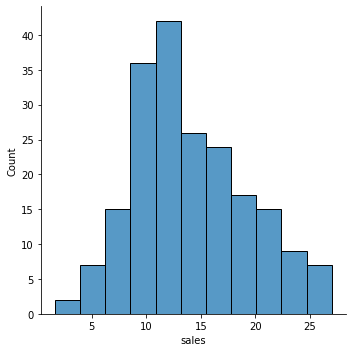

In [20]:
sns.displot(x='sales', data=advertisting);

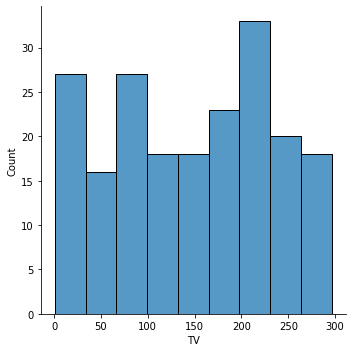

In [22]:
sns.displot(data=advertisting, x='TV');

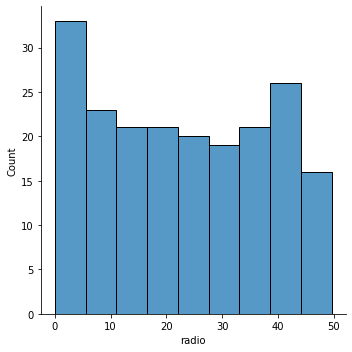

In [24]:
sns.displot(data=advertisting, x='radio');

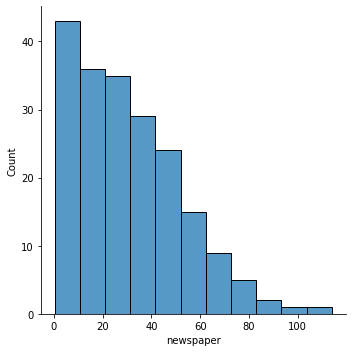

In [25]:
sns.displot(data=advertisting, x='newspaper');

### Note:
+ We can see that spending on TV is higher than other channels.
+ Spending for TV and Radio seems uniform, however Newspaper spending is Right Skewed.

## Part 3: Exploring Relationships between Predictors and Response

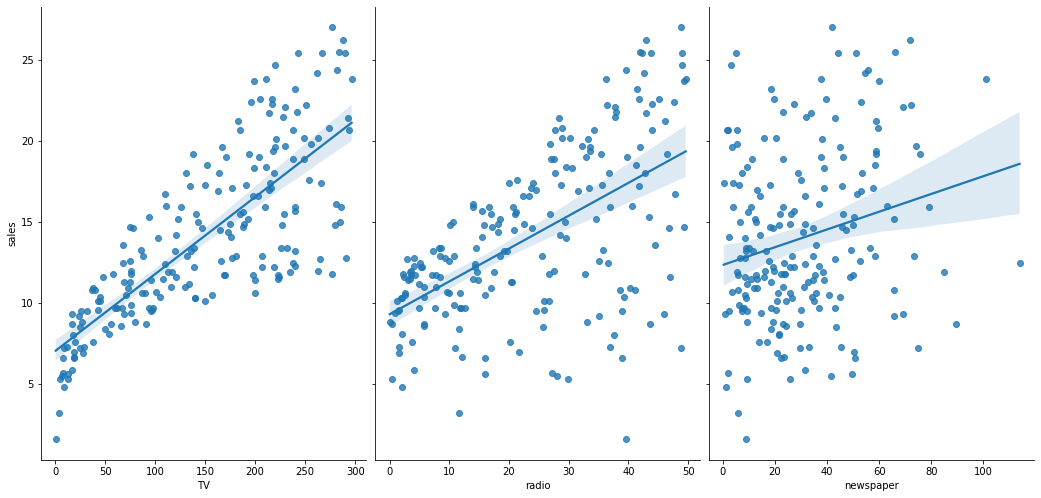

In [36]:
sns.pairplot(data=advertisting, 
             x_vars=['TV', 'radio', 'newspaper'], 
             y_vars='sales',
            height=7,
            aspect=0.7,
            kind='reg');

#### Note:
+ We can see that TV has the highest correlation with Sales.
+ Weak relation between Radio and Sales.
+ Very weak relation between Newspaper and Sales.

In [30]:
advertisting.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

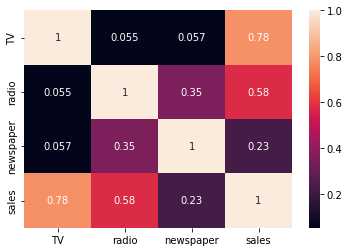

In [37]:
sns.heatmap(advertisting.corr(), annot=True);

## Part 4: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

### Separate Features and Labels

In [47]:
X = advertisting[['TV']] # as this is simple linear regression, we decided to use TV as our single feature
y = advertisting[['sales']]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape

((160, 1), (40, 1))

In [51]:
y_train.shape, y_test.shape

((160, 1), (40, 1))

## Part 5: Interpreting Model Coefficients

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr_model = LinearRegression()

In [54]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [55]:
lr_model.intercept_

array([7.11963843])

In [59]:
lr_model.coef_ 

array([[0.04652973]])

In [60]:
lr_model.coef_  * 1000

array([[46.52973371]])

#### How to Interpret the values:
+ One unit increase in TV spending is associated with 0.0465 unit increase in Sales.
+ Example - 1,000 dollars spending on TV advertistment is associated with 46.5 dollars increase in Sales.
+ Take note that these number are association. NOT causation !

## Part 6: Making Predictions with our Model

In [62]:
y_pred = lr_model.predict(X_test)

In [63]:
y_pred[:5]

array([[14.71794394],
       [16.2115484 ],
       [20.74819743],
       [ 7.66403631],
       [17.37013877]])

## Part 7: Model Evaluation Metrics

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Mean Absolute Errror(MAE)

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [65]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae)

MAE:  2.444420003751042


### Mean Squared Error

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [66]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

MSE:  10.204654118800956


### Root Mean Squared Error

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [67]:
rmse = np.sqrt(mse)
print('RMSE: ', rmse)

RMSE:  3.194472431998898


### R^2 score

In [68]:
r2 = r2_score(y_test, y_pred)
print('r^2: ', r2)

r^2:  0.42274365145319936
